In [20]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Computational Mathematics  <a class="tocSkip">

## ODE solvers (or time-stepping methods - numerical solution of IVPs) <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem---[$\star$]" data-toc-modified-id="Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem---[$\star$]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Stability of forward Euler applied to the MSD problem   [$\star$]</a></span></li><li><span><a href="#Homework---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Homework---Implement-improved-Euler-and-compare-with-forward-Euler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Implement improved Euler and compare with forward Euler</a></span></li><li><span><a href="#Homework---Lorenz-system" data-toc-modified-id="Homework---Lorenz-system-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Lorenz system</a></span></li><li><span><a href="#Homework---Circular-orbits-[$\star$]" data-toc-modified-id="Homework---Circular-orbits-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Circular orbits [$\star$]</a></span></li><li><span><a href="#Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implementing Runge-Kutta 4 stage method (RK4)</a></span></li><li><span><a href="#Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]" data-toc-modified-id="Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]</a></span></li></ul></li></ul></div>

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

<div class="optional">

## Homework - Stability of forward Euler applied to the MSD problem   [$\star$]


Implement a forward Euler time-stepping function.

Hint:  your solution might look something like (you need to fill in some gaps):

```Python
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    y0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = ........
        y_all.append(y)
        t = ........
        t_all.append(t)
    return np.array(y_all), np.array(t_all)
```


Run the forward Euler method on the MSD problem from class with the physical and numerical parameters considered in our stability analysis and plots in section 9.2, and plot the solutions obtained, confirming whether you see stability or instability behaviour which is consistent with our plots from the lecture which showed red dots wither being inside or outside the stability region.

</div>

## Homework - Implement improved Euler and compare with forward Euler

Consider the simple scalar equation

$$y'(t)=y,\;\;\; y(0)=1\,.$$

Implement the forward Euler and improved Euler schemes and use them to approximate solutions of this equation for different values of $\Delta t$. Plot the solutions over the time interval $[0, 2\pi]$.

Write a function `approx_error(f, y0, t0, t, h)` that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $\Delta t$ from $1$ to $10^{-5}$, and plot it against $\Delta t$ in logarithmic scale.

Use `numpy.polyfit` to compute a line of best fit to the logs of the data and hence conclude the order of accuracy of both methods.

You should observe that improved Euler is much better than forward Euler - plot the error as a function of time (suggest you use a semilogy in matplotlib to get a log axis on the $y$ axis, but plot the $x$ (time) axis normally. 

See if you can get [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) working for this problem and see how its errors compare as a function of time - hint: take note of the order that odeint assumes the function $f$ takes the arguments $t$ and $y$, you can pass the argument `tfirst=True` to tell it to assume an order consistent with what convention we assume.

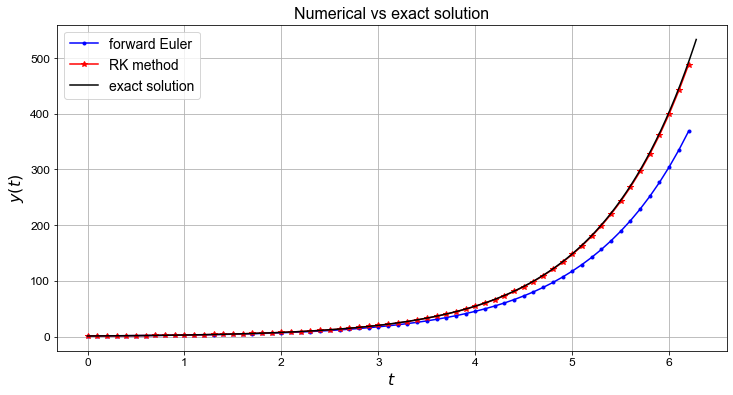

In [22]:
# set some numerical (time-stepping) parameters
dt = 0.1
tend = 2*3.14

# define our time levels with a fixed dt
t = np.arange(0, tend, dt)
# initialise an array to store all solution values (for later plotting)
y = np.empty(len(t))
y2 = np.empty(len(t))
# and set the first entry in array to the initial condition
y[0] = 1
y2[0] = 1

# Foward Euler
# now let's do the time-stepping via a 'for' loop (of course other approaches possible)
for n in range(len(t)-1):
    y[n+1] = y[n] + dt * y[n]

# this was an easy scheme so can implement in one line

# Improved Euler
for n in range(len(t)-1):
    y2[n+1] = y2[n] + 0.5 * dt * (y2[n] * (2 + dt))

def y_ex(t):
    """ Function to evaluate the exact solution to the exponential decay problem.
    """ 
    return np.exp(t)


# now plot the solution
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
ax1.plot(t, y, 'b.-', label='forward Euler')
ax1.plot(t, y2, 'r*-', label='RK method')

# let's use a finer resolution to plot the exact solution to give a smoother line.
t_fine = np.arange(0, tend, dt/100)
ax1.plot(t_fine, y_ex(t_fine), 'k', label='exact solution')
ax1.set_xlabel(r'$t$', fontsize = 16)
ax1.set_ylabel(r'$y(t)$', fontsize = 16)
ax1.set_title('Numerical vs exact solution', fontsize = 16)
ax1.grid(True)
ax1.legend(loc='best', fontsize = 14);

In [23]:
def approx_error(t, time_array, res_FE_arr, res_RK_arr):
    exact = np.exp(t)
    res_FE = res_FE_arr[np.where(time_array==float(t))[0][0]]
    res_RK = res_RK_arr[np.where(time_array==float(t))[0][0]]
    
    err_FE = exact-res_FE
    err_RK = exact-res_RK
    
    return err_FE, err_RK

In [24]:
dt = 1
list_err_FE = []
list_err_RK = []
while (dt > 1e-5):
    tend = 2*3.14

    # define our time levels with a fixed dt
    t = np.arange(0, tend, dt)
    # initialise an array to store all solution values (for later plotting)
    y = np.empty(len(t))
    y2 = np.empty(len(t))
    # and set the first entry in array to the initial condition
    y[0] = 1
    y2[0] = 1

    # Foward Euler
    # now let's do the time-stepping via a 'for' loop (of course other approaches possible)
    for n in range(len(t)-1):
        y[n+1] = y[n] + dt * y[n]

    # this was an easy scheme so can implement in one line

    # Improved Euler
    for n in range(len(t)-1):
        y2[n+1] = y2[n] + 0.5 * dt * (y2[n] * (2 + dt))

    err_FE, err_RK = approx_error(3, t, y, y2)
    
    list_err_FE.append(err_FE)
    list_err_RK.append(err_RK)
    
    dt = dt/10

In [25]:
print(list_err_FE)
print(list_err_RK)

[12.085536923187668, 2.636134654301255, 0.2970706612632874, 0.030085680037849727, 0.0030124037772303325]
[4.460536923187668, 0.09298002709919473, 0.0009967501642371701, 1.0035236826411165e-05, 1.0042043996350003e-07]


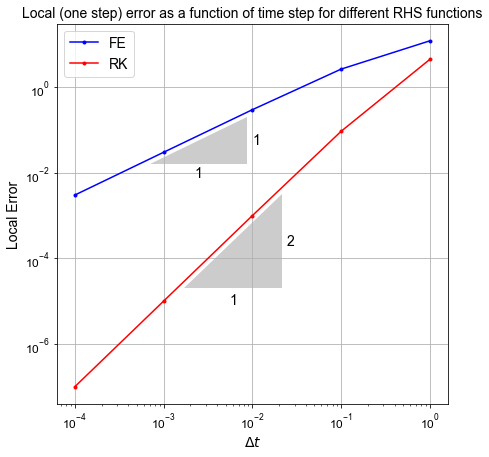

In [26]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog([1, 0.1, 0.01, 0.001, 0.0001], list_err_FE, 'b.-', label = 'FE')
ax1.loglog([1, 0.1, 0.01, 0.001, 0.0001], list_err_RK, 'r.-', label = 'RK')
ax1.set_xlabel(r'$\Delta t$', fontsize = 14)
ax1.set_ylabel('Local Error', fontsize = 14)
ax1.set_title('Local (one step) error as a function of time step for different RHS functions', 
              fontsize = 14)
ax1.grid(True)
ax1.legend(loc='best', fontsize = 14)
annotation.slope_marker((1.7e-3, 2e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((7.e-4, 1.6e-2), (1, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

## Homework - Lorenz system

Recall the image at the beginning of the lecture.

The [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system "Lorenz system") comprises three coupled ODEs:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x), \\[5pt]
\frac{dy}{dt} &= x(\rho - z) - y, \\[5pt]
\frac{dz}{dt} &= x  y - \beta  z,
\end{align*}

where typical values of the parameters (for a chaotic solution) are $\rho = 28, \, \sigma = 10, \, \beta = 8/3$.

Use forward Euler and improved Euler solvers to plot a solution trajectory - do you see qualitative differences between your trajectories with the two solvers.

To check your answer (after you have attempted it please!), see [https://matplotlib.org/examples/mplot3d/lorenz_attractor.html](https://matplotlib.org/examples/mplot3d/lorenz_attractor.html).

See also [https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation](https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation) for a solution that uses scipy's odeint function. 


Now use your forward Euler and improved Euler solvers to compute and plot the growth in 'error' as a function of time, where here we are defining 'error' to be the difference compared to a solution obtained with `odeint`. 



In [27]:
# set some numerical (time-stepping) parameters
dt = 0.01

# define our time levels with a fixed dt
t = np.arange(0, 40, dt)
z = np.zeros(len(t))
y = np.zeros(len(t))
x = np.zeros(len(t))
z[0] = 1
y[0] = 1
x[0] = 1

In [28]:
for n in range(len(t)-1):
    x[n+1] = x[n] + 10*dt*(y[n] - x[n])
    z[n+1] = z[n] + dt * (x[n]*y[n] - (8/3)*z[n])
    y[n+1] = y[n]*(1-dt) + dt * x[n]*(28 - z[n])

In [29]:
# define our time levels with a fixed dt
dt = 0.01
t = np.arange(0, 40, dt)
zRK = np.zeros(len(t))
yRK = np.zeros(len(t))
xRK = np.zeros(len(t))
zRK[0] = 1
yRK[0] = 1
xRK[0] = 1
for n in range(len(t)-1):
    xRK[n+1] = xRK[n] + 0.5*dt*()
    zRK[n+1] = zRK[n] + 0.5*dt*(xRK[n]*(28-zRK[n])*(dt+1)-dt*yRK[n])
    yRK[n+1] = yRK[n] + 0.5*dt*(xRK[n]*yRK[n]*(dt+1)+zRK[n]*(1-(8/3)*(1+dt)))

TypeError: can't multiply sequence by non-int of type 'float'

Text(0.5, 0, 'Y Axe')

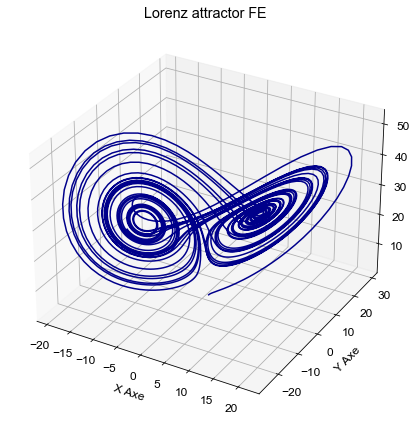

In [30]:
fig = plt.figure(figsize=(32,16))

ax = fig.add_subplot(2, 1, 1, projection='3d')
# Data for a three-dimensional line
zline = z
xline = x
yline = y
ax.plot3D(xline, yline, zline, 'darkblue')
plt.title('Lorenz attractor FE')
plt.xlabel('X Axe')
plt.ylabel('Y Axe')

# ax = fig.add_subplot(2, 2, 2, projection='3d')
# # Data for a three-dimensional line
# zline = zRK
# xline = xRK
# yline = yRK
# ax.plot3D(xline, yline, zline, 'darkblue')
# plt.title('Lorenz attractor RK')
# plt.xlabel('X Axe')
# plt.ylabel('Y Axe')

Text(0.5, 0.92, 'Lorenz system computed with odeint')

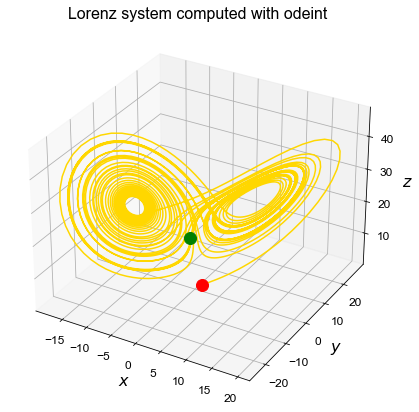

In [35]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# problem parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# RHS function - NOTE THAT if we have t as the first argument we need to tell
# odeint this using tfirst=True
def f(t, state):
    """ RHS function for Lorenz system
    """
    f = np.zeros_like(state)
    # unpack the state vector
    x, y, z = state  
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
dt = 0.01
t = np.arange(0.0, 40.0, dt)

# solve using odeint
states = odeint(f, state0, t, tfirst=True)

fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(states[:, 0], states[:, 1], states[:, 2], 'gold')
ax1.plot( [states[0, 0]], [states[0, 1]], [states[0, 2]], 'ro', markersize=12)
ax1.plot( [states[-1, 0]], [states[-1, 1]], [states[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system computed with odeint', fontsize = 16)

Text(0, 0.5, 'error')

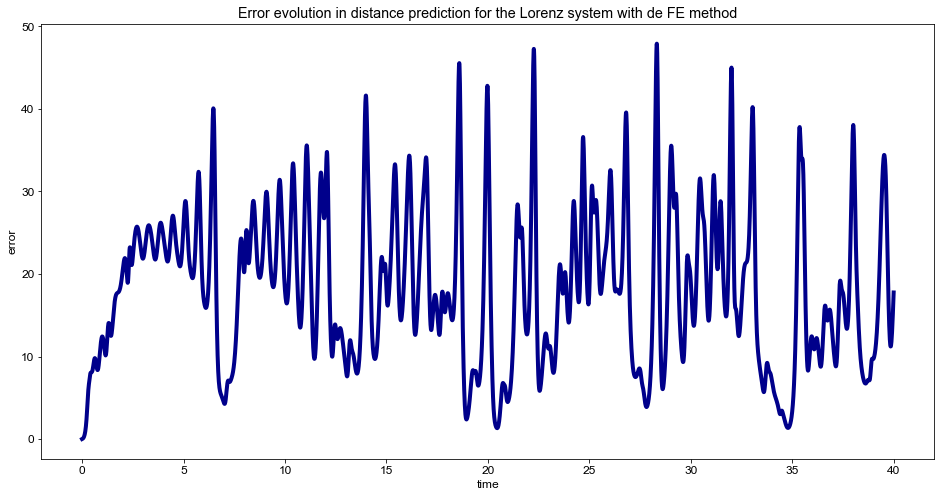

In [37]:
fig = plt.figure(figsize=(16, 8))

# ax = fig.add_subplot(4, 1, 1)
# err = (states[:, 2] - zline)
# plt.plot(t, err, 'darkblue', linewidth=4)
# plt.title('Error evolution in z prediction for the Lorenz system with de FE method')
# plt.xlabel('time')
# plt.ylabel('error')

# ax = fig.add_subplot(4, 1, 2)
# err = states[:, 1] - yline
# plt.plot(t, err, 'darkblue', linewidth=4)
# plt.title('Error evolution in y prediction for the Lorenz system with de FE method')
# plt.xlabel('time')
# plt.ylabel('error')

# ax = fig.add_subplot(4, 1, 3)
# err = states[:, 0] - xline
# plt.plot(t, err, 'darkblue', linewidth=4)
# plt.title('Error evolution in x prediction for the Lorenz system with de FE method')
# plt.xlabel('time')
# plt.ylabel('error')

ax = fig.add_subplot(1, 1, 1)
plt.plot(t, np.linalg.norm(states - np.column_stack((xline,yline,zline)), axis=1), 'darkblue', linewidth=4)
plt.title('Error evolution in distance prediction for the Lorenz system with de FE method')
plt.xlabel('time')
plt.ylabel('error')

<div class="optional">
    
## Homework - Circular orbits [$\star$]

Consider the coupled problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x,
\end{align*} 

with initial conditions 

$$ x(0)=1,\;\;\;\; y(0)=0. $$

We expect the solution (trajectory) to form a closed circle (why?  think simple harmonic motion).

Solve this problem using forward Euler and Improved Euler and simulate several orbits, plotting the result in $(x,y)$ space. 

What do you observe about the qualitative solution behaviour?

</div>

## Homework - Implementing Runge-Kutta 4 stage method (RK4)

Write a general Python function that implements the classical RK4 method for a given RHS function, and apply it to the problem we used previously to compare the errors between forward Euler and improved Euler (recalling that we can interpret IE as a predictor-corrector LMS pair, or as a Runge-Kutta method RK2($\alpha=1$)):

$$y'(t)=y,\;\;\; y(0)=1,$$

and where we evaluate the error at the time $t = 2\pi$.

<div class="advanced">

## Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]


See here for an interesting paper on the use of ODE solvers to model the solar system which is then used to find the location of Neptune: <http://www.diva-portal.org/smash/get/diva2:1218549/FULLTEXT01.pdf>, and establish the chaotic nature of the solar system: <http://science.sciencemag.org/content/257/5066/56/tab-pdf>

See also <https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.30.091201.140243>


Consider the problem of two bodies attracting one another under the force of gravity. Choose one of the bodies as the centre of our frame of reference (think of this body as a star).  Then the motion of the second body (think of a planet or a comet) will be restricted to a two-dimensional plane and it common to denote the coordinate of its position using the notation $\boldsymbol{q}=(q_1,q_2)^T$.

By Newton's second law we can link the acceleration of the second body to the force (per unit mass) experienced on that body due to gravity:

$$\ddot{\boldsymbol{q}} = -\frac{K}{\|\boldsymbol{q}\|^2}\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|}, $$

where $K$ is the product of the star's mass and the gravitational constant. The division by $\|\boldsymbol{q}\|^2$ emphasises that this is an ['inverse square law'](https://en.wikipedia.org/wiki/Inverse-square_law) problem; the ${q}/{\|\boldsymbol{q}\|}$ term is a normalised direction, and the minus sign is due to this being a force of attraction.

With a suitable nondimensionalisation of the problem we can actually just consider the ODE

$$\ddot{\boldsymbol{q}} = -\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|^3}, $$

or written out in full

\begin{align*}
\ddot{q_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\ddot{q_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}

We can turn this into the first-order system

\begin{align*}
\dot{q_1} &= p_1,\\[5pt]
\dot{q_2} &= p_2,\\[5pt]
\dot{p_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\dot{p_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}


For an orbit with eccentricity $e \in [0,1)$ we can use initial conditions

\begin{align*}
q_1(0) &= 1 - e, \\[5pt]
q_2(0) &= 0, \\[5pt]
p_1(0) &= 0, \\[5pt]
q_2(0) &= \left(\frac{1 + e}{1 - e}\right)^{1/2}.
\end{align*}

With an eccentricity of zero we revert back to the circular orbit case above. With $e$ closer to 1 we get a more eccentric orbit.

The period of an orbit should be $2\pi$. Simulate this problem for 10 periods using forward and improved Euler and see what orbits you get. Suggest you test the eccentricity values 0.5 and 0.9.

In this problem total energy (kinetic plus potential) should be conserved. Here this is given by

$$H := \frac{1}{2}\|\boldsymbol{p}\|^2 - \frac{1}{\|\boldsymbol{q}\|}.$$

Another conserved quantity is the angular momentum defined as

$$L := q_1p_2 - q_2p_1. $$

Compute and plot these for your solution and see how well this quantity is conserved by our solvers.

</div>